In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Locations of undamaged Z24_36week data first:
train36_s1='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/train36_sen1_324rels.csv'
train36_s2='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/train36_sen2_320rels.csv'
train36_s3='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/train36_sen3_312rels.csv'
train36_s4='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/train36_sen4_318rels.csv'
train36_s5='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/train36_sen5_327rels.csv'
train36_s6='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/train36_sen6_333rels.csv'
train36_s7='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/train36_sen7_334rels.csv'
train36_s8='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/train36_sen8_329rels.csv'

# locations of undamaged Z24_39week data second:
train39_s1='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/train39_sen1_334rels.csv'
train39_s2='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/train39_sen2_324rels.csv'
train39_s3='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/train39_sen3_318rels.csv'
train39_s4='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/train39_sen4_320rels.csv'
train39_s5='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/train39_sen5_334rels.csv'
train39_s6='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/train39_sen6_332rels.csv'
train39_s7='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/train39_sen7_336rels.csv'
train39_s8='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/train39_sen8_335rels.csv'

# Locations of damaged Z24_41week data third:
test41_s1='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/test41_sen1_184rels.csv'
test41_s2='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/test41_sen2_170rels.csv'
test41_s3='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/test41_sen3_170rels.csv'
test41_s4='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/test41_sen4_172rels.csv'
test41_s5='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/test41_sen5_186rels.csv'
test41_s6='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/test41_sen6_182rels.csv'
test41_s7='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/test41_sen7_182rels.csv'
test41_s8='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/test41_sen8_178rels.csv'

# Locations of damaged Z24_43week data fourth:
test43_s1='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/test43_sen1_84rels.csv'
test43_s2='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/test43_sen2_84rels.csv'
test43_s3='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/test43_sen3_84rels.csv'
test43_s4='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/test43_sen4_84rels.csv'
test43_s5='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/test43_sen5_83rels.csv'
test43_s6='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/test43_sen6_82rels.csv'
test43_s7='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/test43_sen7_83rels.csv'
test43_s8='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/test43_sen8_84rels.csv'

import sys
sys.path.insert(0,'/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/4DOF_system')
from evaluation import r2, MSE, CV, corr
from testing import*

In [4]:
# load data
start=1
end=51
cc=end-start
num_rel_train=310 # select 310r for all training data
w36_s1_train=pd.read_csv(train36_s1,header=None).values[start:end,0:num_rel_train].T
w36_s2_train=pd.read_csv(train36_s2,header=None).values[start:end,0:num_rel_train].T
w36_s3_train=pd.read_csv(train36_s3,header=None).values[start:end,0:num_rel_train].T
w36_s4_train=pd.read_csv(train36_s4,header=None).values[start:end,0:num_rel_train].T
w36_s5_train=pd.read_csv(train36_s5,header=None).values[start:end,0:num_rel_train].T
w36_s6_train=pd.read_csv(train36_s6,header=None).values[start:end,0:num_rel_train].T
w36_s7_train=pd.read_csv(train36_s7,header=None).values[start:end,0:num_rel_train].T
w36_s8_train=pd.read_csv(train36_s8,header=None).values[start:end,0:num_rel_train].T

w39_s1_train=pd.read_csv(train39_s1,header=None).values[start:end,0:num_rel_train].T
w39_s2_train=pd.read_csv(train39_s2,header=None).values[start:end,0:num_rel_train].T
w39_s3_train=pd.read_csv(train39_s3,header=None).values[start:end,0:num_rel_train].T
w39_s4_train=pd.read_csv(train39_s4,header=None).values[start:end,0:num_rel_train].T
w39_s5_train=pd.read_csv(train39_s5,header=None).values[start:end,0:num_rel_train].T
w39_s6_train=pd.read_csv(train39_s6,header=None).values[start:end,0:num_rel_train].T
w39_s7_train=pd.read_csv(train39_s7,header=None).values[start:end,0:num_rel_train].T
w39_s8_train=pd.read_csv(train39_s8,header=None).values[start:end,0:num_rel_train].T

w41_s1_test=pd.read_csv(test41_s1,header=None).values[start:end,:].T
w41_s2_test=pd.read_csv(test41_s2,header=None).values[start:end,:].T
w41_s3_test=pd.read_csv(test41_s3,header=None).values[start:end,:].T
w41_s4_test=pd.read_csv(test41_s4,header=None).values[start:end,:].T
w41_s5_test=pd.read_csv(test41_s5,header=None).values[start:end,:].T
w41_s6_test=pd.read_csv(test41_s6,header=None).values[start:end,:].T
w41_s7_test=pd.read_csv(test41_s7,header=None).values[start:end,:].T
w41_s8_test=pd.read_csv(test41_s8,header=None).values[start:end,:].T

w43_s1_test=pd.read_csv(test43_s1,header=None).values[start:end,:].T
w43_s2_test=pd.read_csv(test43_s2,header=None).values[start:end,:].T
w43_s3_test=pd.read_csv(test43_s3,header=None).values[start:end,:].T
w43_s4_test=pd.read_csv(test43_s4,header=None).values[start:end,:].T
w43_s5_test=pd.read_csv(test43_s5,header=None).values[start:end,:].T
w43_s6_test=pd.read_csv(test43_s6,header=None).values[start:end,:].T
w43_s7_test=pd.read_csv(test43_s7,header=None).values[start:end,:].T
w43_s8_test=pd.read_csv(test43_s8,header=None).values[start:end,:].T

# **Normalization**

In [5]:
# 220 for training, 90 for testing

In [6]:
# define new num_rel_train
num_rel_train=220
combine_train=np.zeros((num_rel_train*(8+8),end-start))

# For week 36 data:
combine_train[0:num_rel_train,:]=w36_s1_train[0:num_rel_train,:]
combine_train[num_rel_train*1:num_rel_train*2,:]=w36_s2_train[0:num_rel_train,:]
combine_train[num_rel_train*2:num_rel_train*3,:]=w36_s3_train[0:num_rel_train,:]
combine_train[num_rel_train*3:num_rel_train*4,:]=w36_s4_train[0:num_rel_train,:]
combine_train[num_rel_train*4:num_rel_train*5,:]=w36_s5_train[0:num_rel_train,:]
combine_train[num_rel_train*5:num_rel_train*6,:]=w36_s6_train[0:num_rel_train,:]
combine_train[num_rel_train*6:num_rel_train*7,:]=w36_s7_train[0:num_rel_train,:]
combine_train[num_rel_train*7:num_rel_train*8,:]=w36_s8_train[0:num_rel_train,:]
# For week 39 data:
combine_train[num_rel_train*8:num_rel_train*9,:]=w39_s1_train[0:num_rel_train,:]
combine_train[num_rel_train*9:num_rel_train*10,:]=w39_s2_train[0:num_rel_train,:]
combine_train[num_rel_train*10:num_rel_train*11,:]=w39_s3_train[0:num_rel_train,:]
combine_train[num_rel_train*11:num_rel_train*12,:]=w39_s4_train[0:num_rel_train,:]
combine_train[num_rel_train*12:num_rel_train*13,:]=w39_s5_train[0:num_rel_train,:]
combine_train[num_rel_train*13:num_rel_train*14,:]=w39_s6_train[0:num_rel_train,:]
combine_train[num_rel_train*14:num_rel_train*15,:]=w39_s7_train[0:num_rel_train,:]
combine_train[num_rel_train*15:num_rel_train*16,:]=w39_s8_train[0:num_rel_train,:]

target_train=combine_train

In [7]:
# Define normalization function
def norm(target,combine_train):
  norm_data=(target-np.min(combine_train))/(np.max(combine_train)-np.min(combine_train))
  return norm_data

In [8]:
# Normalize training data:
norm_train=norm(target_train,combine_train)
norm_train.shape

# Normalize testing undamaged data:
norm_w36_s1_test=norm(w36_s1_train[num_rel_train:310,:],combine_train)
norm_w36_s2_test=norm(w36_s2_train[num_rel_train:310,:],combine_train)
norm_w36_s3_test=norm(w36_s3_train[num_rel_train:310,:],combine_train)
norm_w36_s4_test=norm(w36_s4_train[num_rel_train:310,:],combine_train)
norm_w36_s5_test=norm(w36_s5_train[num_rel_train:310,:],combine_train)
norm_w36_s6_test=norm(w36_s6_train[num_rel_train:310,:],combine_train)
norm_w36_s7_test=norm(w36_s7_train[num_rel_train:310,:],combine_train)
norm_w36_s8_test=norm(w36_s8_train[num_rel_train:310,:],combine_train)

norm_w39_s1_test=norm(w39_s1_train[num_rel_train:310,:],combine_train)
norm_w39_s2_test=norm(w39_s2_train[num_rel_train:310,:],combine_train)
norm_w39_s3_test=norm(w39_s3_train[num_rel_train:310,:],combine_train)
norm_w39_s4_test=norm(w39_s4_train[num_rel_train:310,:],combine_train)
norm_w39_s5_test=norm(w39_s5_train[num_rel_train:310,:],combine_train)
norm_w39_s6_test=norm(w39_s6_train[num_rel_train:310,:],combine_train)
norm_w39_s7_test=norm(w39_s7_train[num_rel_train:310,:],combine_train)
norm_w39_s8_test=norm(w39_s8_train[num_rel_train:310,:],combine_train)

In [9]:
# Divide the undamaged data into training and testing
cp_norm_train=np.array(norm_train,copy=True)# Retain the original order for check

# Then shuffle the order
np.random.shuffle(cp_norm_train)


In [10]:
cp_norm_train.shape

(3520, 50)

In [11]:
# Normalize testing data:
norm_w41_s1_test=norm(w41_s1_test,combine_train)
norm_w41_s2_test=norm(w41_s2_test,combine_train)
norm_w41_s3_test=norm(w41_s3_test,combine_train)
norm_w41_s4_test=norm(w41_s4_test,combine_train)
norm_w41_s5_test=norm(w41_s5_test,combine_train)
norm_w41_s6_test=norm(w41_s6_test,combine_train)
norm_w41_s7_test=norm(w41_s7_test,combine_train)
norm_w41_s8_test=norm(w41_s8_test,combine_train)

norm_w43_s1_test=norm(w43_s1_test,combine_train)
norm_w43_s2_test=norm(w43_s2_test,combine_train)
norm_w43_s3_test=norm(w43_s3_test,combine_train)
norm_w43_s4_test=norm(w43_s4_test,combine_train)
norm_w43_s5_test=norm(w43_s5_test,combine_train)
norm_w43_s6_test=norm(w43_s6_test,combine_train)
norm_w43_s7_test=norm(w43_s7_test,combine_train)
norm_w43_s8_test=norm(w43_s8_test,combine_train)

# **Load pre-trained GAE**

In [12]:
from keras.models import model_from_json

loc_Z24_json='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/model_gae.json'
loc_Z24_weights=loc_Z24='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/model_gae.h5'
# load json and create model
json_file = open(loc_Z24_json, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(loc_Z24_weights)
print("Loaded model from disk")

Loaded model from disk


In [13]:
loaded_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
dense (Dense)                (None, 10)                510       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                550       
Total params: 1,060
Trainable params: 1,060
Non-trainable params: 0
_________________________________________________________________


In [14]:
loaded_model.compile(optimizer='adam', loss='mse')

In [15]:
history_retrain=loaded_model.fit(cp_norm_train,
                 cp_norm_train,
                 batch_size=32,
                 epochs=300,
                 
                 shuffle=True,
                 initial_epoch=0)

Epoch 1/300
110/110 [==============================] - 1s 1ms/step - loss: 0.0851
Epoch 2/300
110/110 [==============================] - 0s 1ms/step - loss: 0.0319
Epoch 3/300
110/110 [==============================] - 0s 1ms/step - loss: 0.0201
Epoch 4/300
110/110 [==============================] - 0s 1ms/step - loss: 0.0139
Epoch 5/300
110/110 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 6/300
110/110 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 7/300
110/110 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 8/300
110/110 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 9/300
110/110 [==============================] - 0s 1ms/step - loss: 9.2523e-04
Epoch 10/300
110/110 [==============================] - 0s 1ms/step - loss: 7.1140e-04
Epoch 11/300
110/110 [==============================] - 0s 1ms/step - loss: 6.6158e-04
Epoch 12/300
110/110 [==============================] - 0s 1ms/step - loss: 6.5825e-

In [16]:
# Reconstruction of training data
rec_train=loaded_model.predict(norm_train)

# separate original into 8 sensors
norm_w36_s1_train=norm_train[0:num_rel_train,:]
norm_w36_s2_train=norm_train[num_rel_train*1:num_rel_train*2,:]
norm_w36_s3_train=norm_train[num_rel_train*2:num_rel_train*3,:]
norm_w36_s4_train=norm_train[num_rel_train*3:num_rel_train*4,:]
norm_w36_s5_train=norm_train[num_rel_train*4:num_rel_train*5,:]
norm_w36_s6_train=norm_train[num_rel_train*5:num_rel_train*6,:]
norm_w36_s7_train=norm_train[num_rel_train*6:num_rel_train*7,:]
norm_w36_s8_train=norm_train[num_rel_train*7:num_rel_train*8,:]

norm_w39_s1_train=norm_train[num_rel_train*8:num_rel_train*9,:]
norm_w39_s2_train=norm_train[num_rel_train*9:num_rel_train*10,:]
norm_w39_s3_train=norm_train[num_rel_train*10:num_rel_train*11,:]
norm_w39_s4_train=norm_train[num_rel_train*11:num_rel_train*12,:]
norm_w39_s5_train=norm_train[num_rel_train*12:num_rel_train*13,:]
norm_w39_s6_train=norm_train[num_rel_train*13:num_rel_train*14,:]
norm_w39_s7_train=norm_train[num_rel_train*14:num_rel_train*15,:]
norm_w39_s8_train=norm_train[num_rel_train*15:num_rel_train*16,:]

# Separate it into 8 sensor
rec_w36_s1_train=rec_train[0:num_rel_train,:]
rec_w36_s2_train=rec_train[num_rel_train*1:num_rel_train*2,:]
rec_w36_s3_train=rec_train[num_rel_train*2:num_rel_train*3,:]
rec_w36_s4_train=rec_train[num_rel_train*3:num_rel_train*4,:]
rec_w36_s5_train=rec_train[num_rel_train*4:num_rel_train*5,:]
rec_w36_s6_train=rec_train[num_rel_train*5:num_rel_train*6,:]
rec_w36_s7_train=rec_train[num_rel_train*6:num_rel_train*7,:]
rec_w36_s8_train=rec_train[num_rel_train*7:num_rel_train*8,:]

rec_w39_s1_train=rec_train[num_rel_train*8:num_rel_train*9,:]
rec_w39_s2_train=rec_train[num_rel_train*9:num_rel_train*10,:]
rec_w39_s3_train=rec_train[num_rel_train*10:num_rel_train*11,:]
rec_w39_s4_train=rec_train[num_rel_train*11:num_rel_train*12,:]
rec_w39_s5_train=rec_train[num_rel_train*12:num_rel_train*13,:]
rec_w39_s6_train=rec_train[num_rel_train*13:num_rel_train*14,:]
rec_w39_s7_train=rec_train[num_rel_train*14:num_rel_train*15,:]
rec_w39_s8_train=rec_train[num_rel_train*15:num_rel_train*16,:]

In [17]:
# Reconstruction of undamaged training data
rec_w36_s1_test=loaded_model.predict(norm_w36_s1_test)
rec_w36_s2_test=loaded_model.predict(norm_w36_s2_test)
rec_w36_s3_test=loaded_model.predict(norm_w36_s3_test)
rec_w36_s4_test=loaded_model.predict(norm_w36_s4_test)
rec_w36_s5_test=loaded_model.predict(norm_w36_s5_test)
rec_w36_s6_test=loaded_model.predict(norm_w36_s6_test)
rec_w36_s7_test=loaded_model.predict(norm_w36_s7_test)
rec_w36_s8_test=loaded_model.predict(norm_w36_s8_test)

rec_w39_s1_test=loaded_model.predict(norm_w39_s1_test)
rec_w39_s2_test=loaded_model.predict(norm_w39_s2_test)
rec_w39_s3_test=loaded_model.predict(norm_w39_s3_test)
rec_w39_s4_test=loaded_model.predict(norm_w39_s4_test)
rec_w39_s5_test=loaded_model.predict(norm_w39_s5_test)
rec_w39_s6_test=loaded_model.predict(norm_w39_s6_test)
rec_w39_s7_test=loaded_model.predict(norm_w39_s7_test)
rec_w39_s8_test=loaded_model.predict(norm_w39_s8_test)

In [18]:
# Reconstruction of damaged week41 data
rec_w41_s1_test=loaded_model.predict(norm_w41_s1_test)
rec_w41_s2_test=loaded_model.predict(norm_w41_s2_test)
rec_w41_s3_test=loaded_model.predict(norm_w41_s3_test)
rec_w41_s4_test=loaded_model.predict(norm_w41_s4_test)
rec_w41_s5_test=loaded_model.predict(norm_w41_s5_test)
rec_w41_s6_test=loaded_model.predict(norm_w41_s6_test)
rec_w41_s7_test=loaded_model.predict(norm_w41_s7_test)
rec_w41_s8_test=loaded_model.predict(norm_w41_s8_test)

# Reconstruction of damaged week43 data
rec_w43_s1_test=loaded_model.predict(norm_w43_s1_test)
rec_w43_s2_test=loaded_model.predict(norm_w43_s2_test)
rec_w43_s3_test=loaded_model.predict(norm_w43_s3_test)
rec_w43_s4_test=loaded_model.predict(norm_w43_s4_test)
rec_w43_s5_test=loaded_model.predict(norm_w43_s5_test)
rec_w43_s6_test=loaded_model.predict(norm_w43_s6_test)
rec_w43_s7_test=loaded_model.predict(norm_w43_s7_test)
rec_w43_s8_test=loaded_model.predict(norm_w43_s8_test)

In [19]:
# Define a visualization function:
def visual(reco, orig, start_index, end_index, rel, dof):
  c=np.arange(start_index,end_index,1) # only visualize 2-51th cepstral coefficients
  plt.figure(figsize=(8,6))
  #plt.title('Observation vs reconstruction for training set',fontsize=14)
  plt.plot(c,orig[rel,:],color='blue', linewidth=1, label='Observed cepstral cefficients (sensor%d)' %dof)
  plt.plot(c,reco[rel,:],color='red', linewidth=1, label='Reconstructed cepstral coefficients (sensor%d)' %dof)
  plt.legend(fontsize=12)
  plt.xticks(size=12)
  plt.yticks(size=12)
  plt.xlabel('Index of cepstral coefficients',size=15)
  plt.ylabel('Magnitude',size=15)
  plt.grid()

**Visualize undamaged training data**

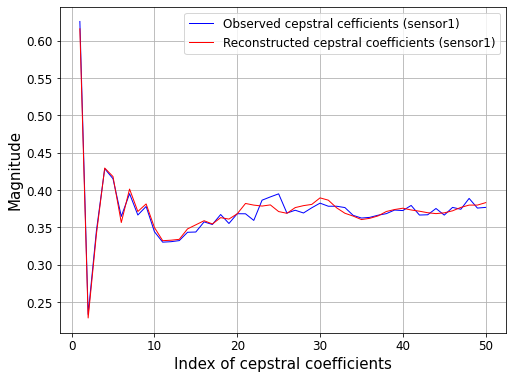

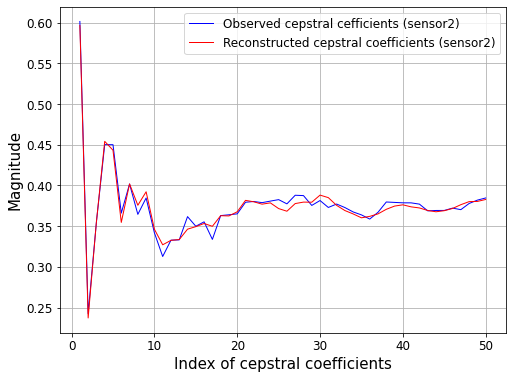

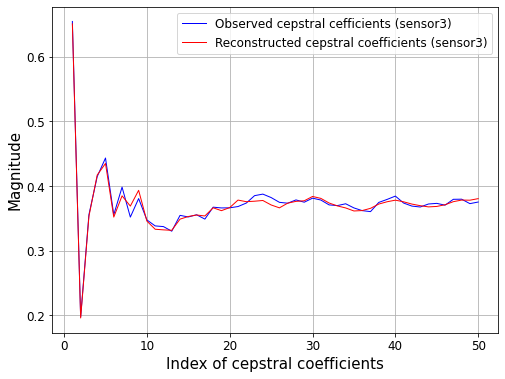

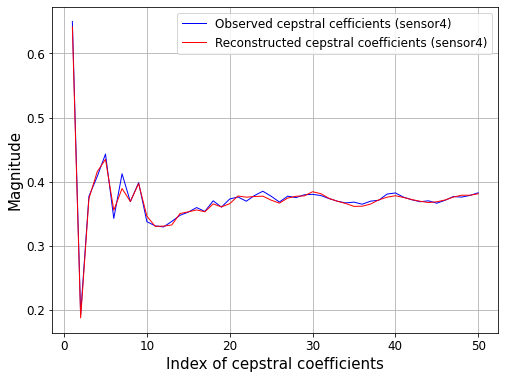

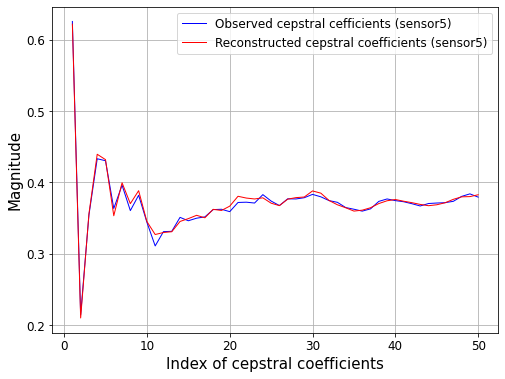

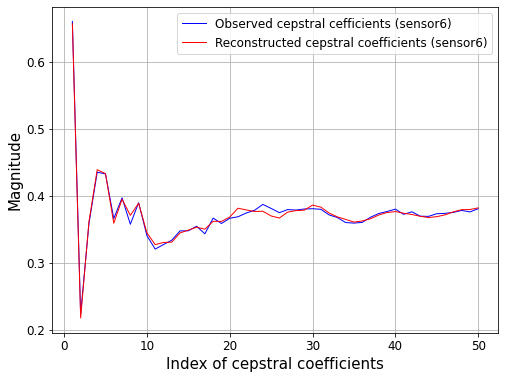

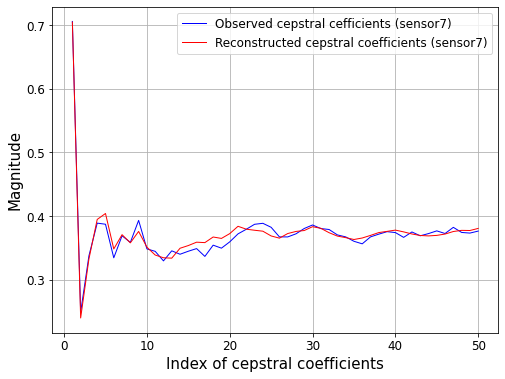

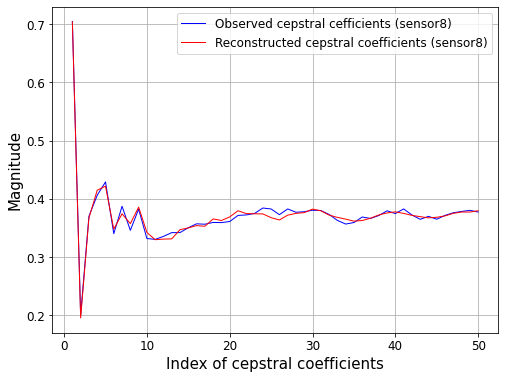

In [20]:
# For week 36 data
vis_rel=16
visual(rec_w36_s1_train,norm_w36_s1_train,start,end,vis_rel,1)
visual(rec_w36_s2_train,norm_w36_s2_train,start,end,vis_rel,2)
visual(rec_w36_s3_train,norm_w36_s3_train,start,end,vis_rel,3)
visual(rec_w36_s4_train,norm_w36_s4_train,start,end,vis_rel,4)
visual(rec_w36_s5_train,norm_w36_s5_train,start,end,vis_rel,5)
visual(rec_w36_s6_train,norm_w36_s6_train,start,end,vis_rel,6)
visual(rec_w36_s7_train,norm_w36_s7_train,start,end,vis_rel,7)
visual(rec_w36_s8_train,norm_w36_s8_train,start,end,vis_rel,8)



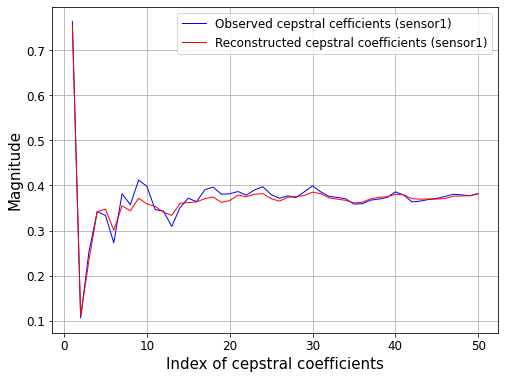

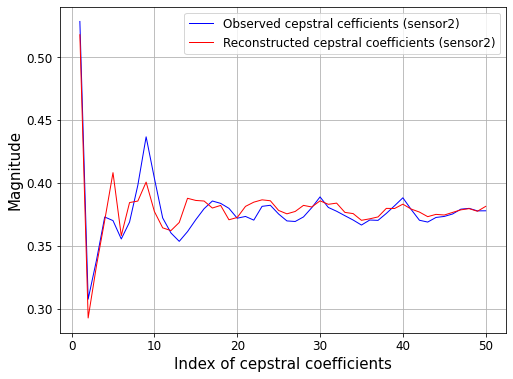

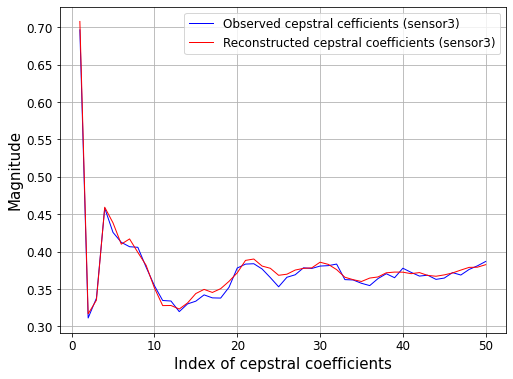

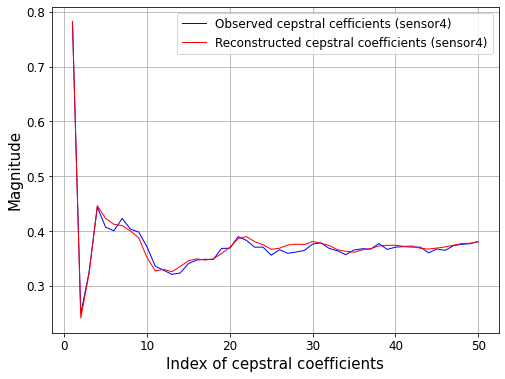

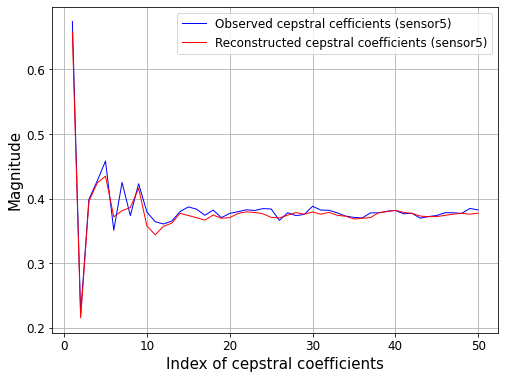

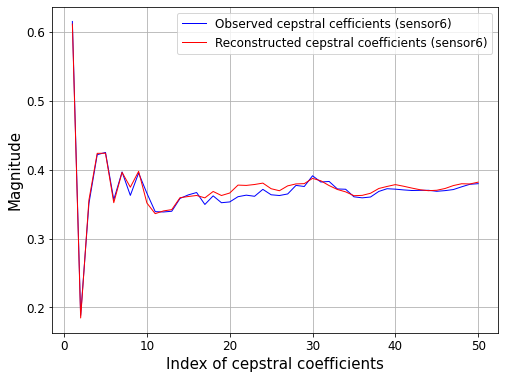

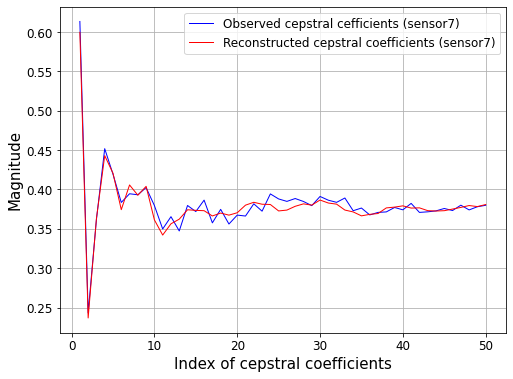

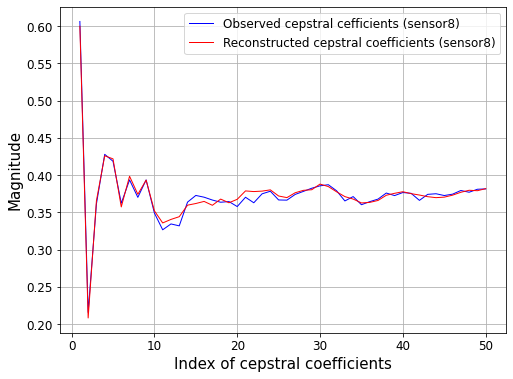

In [21]:
# For week 39 data
visual(rec_w39_s1_train,norm_w39_s1_train,start,end,vis_rel,1)
visual(rec_w39_s2_train,norm_w39_s2_train,start,end,vis_rel,2)
visual(rec_w39_s3_train,norm_w39_s3_train,start,end,vis_rel,3)
visual(rec_w39_s4_train,norm_w39_s4_train,start,end,vis_rel,4)
visual(rec_w39_s5_train,norm_w39_s5_train,start,end,vis_rel,5)
visual(rec_w39_s6_train,norm_w39_s6_train,start,end,vis_rel,6)
visual(rec_w39_s7_train,norm_w39_s7_train,start,end,vis_rel,7)
visual(rec_w39_s8_train,norm_w39_s8_train,start,end,vis_rel,8)

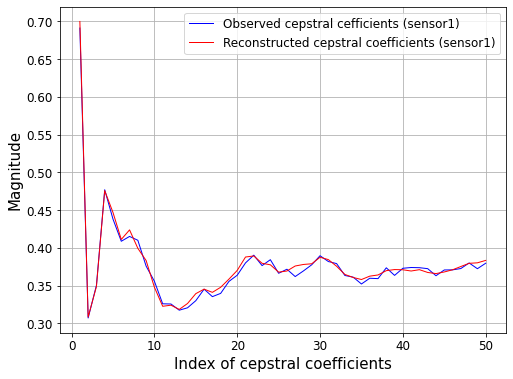

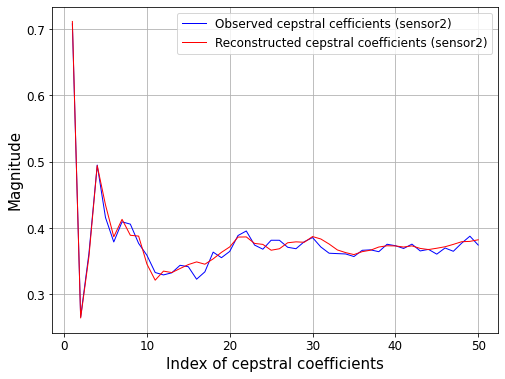

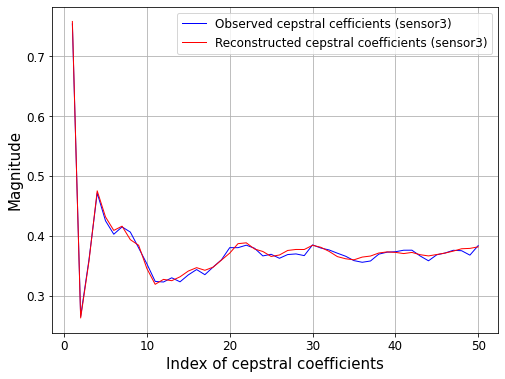

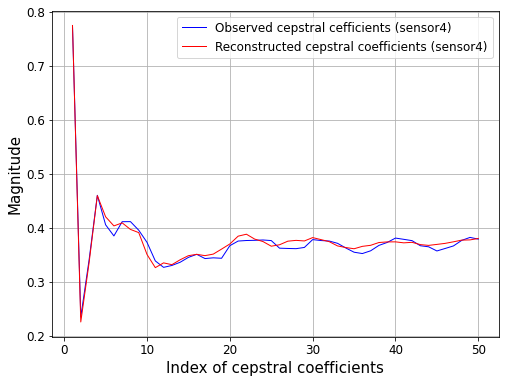

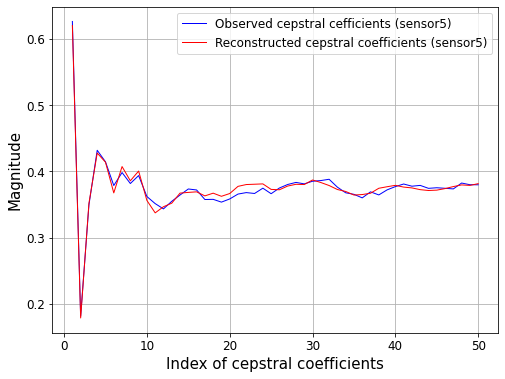

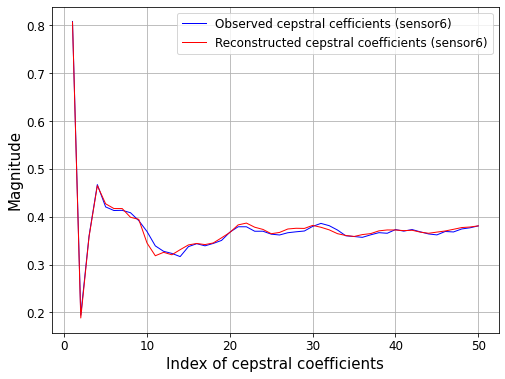

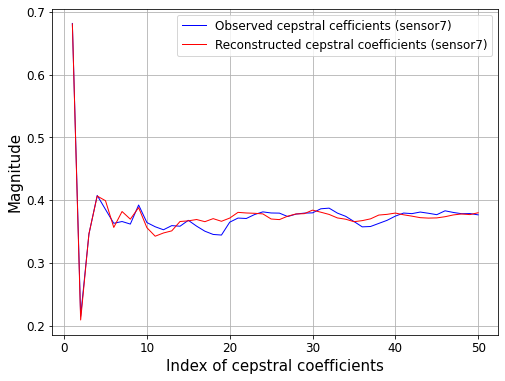

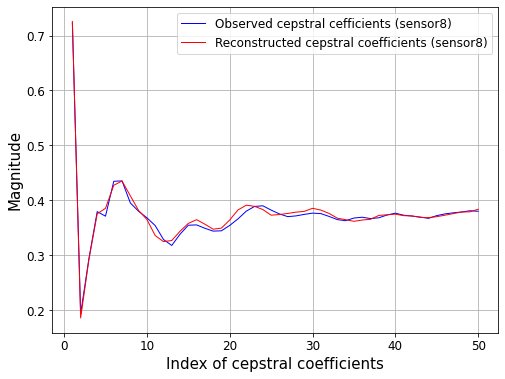

In [22]:
# For week 41 data
visual(rec_w41_s1_test,norm_w41_s1_test,start,end,vis_rel,1)
visual(rec_w41_s2_test,norm_w41_s2_test,start,end,vis_rel,2)
visual(rec_w41_s3_test,norm_w41_s3_test,start,end,vis_rel,3)
visual(rec_w41_s4_test,norm_w41_s4_test,start,end,vis_rel,4)
visual(rec_w41_s5_test,norm_w41_s5_test,start,end,vis_rel,5)
visual(rec_w41_s6_test,norm_w41_s6_test,start,end,vis_rel,6)
visual(rec_w41_s7_test,norm_w41_s7_test,start,end,vis_rel,7)
visual(rec_w41_s8_test,norm_w41_s8_test,start,end,vis_rel,8)

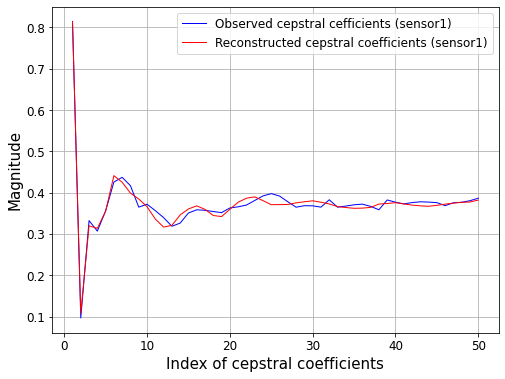

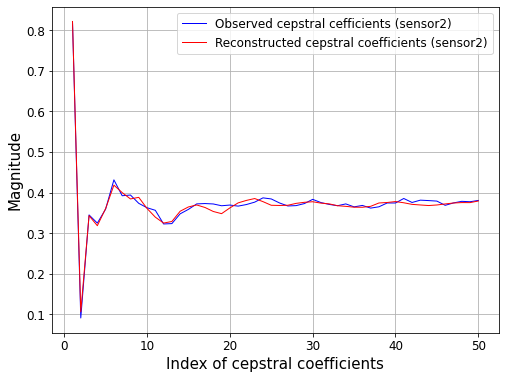

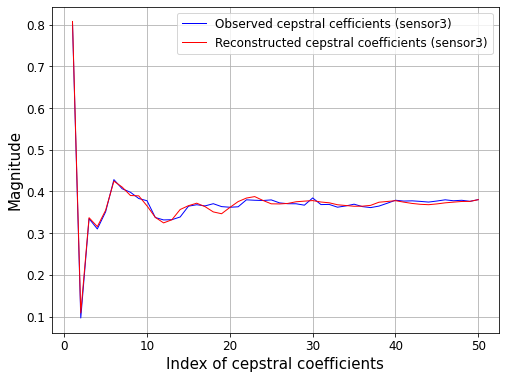

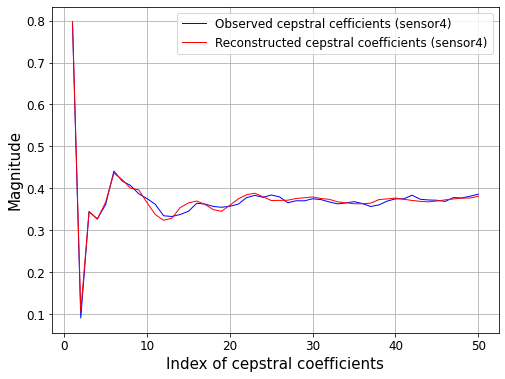

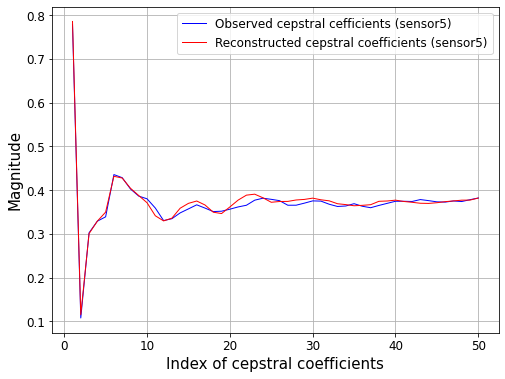

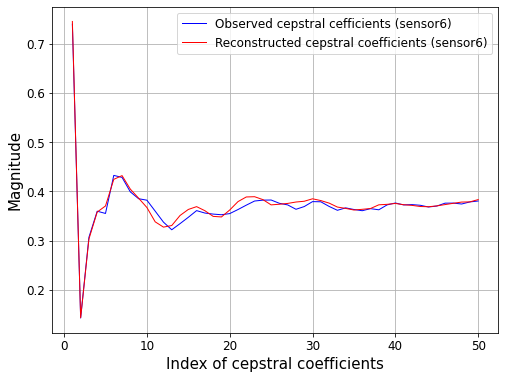

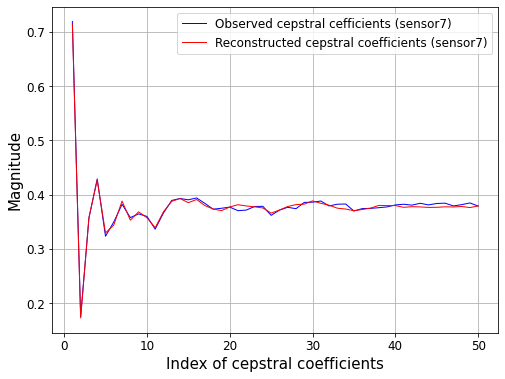

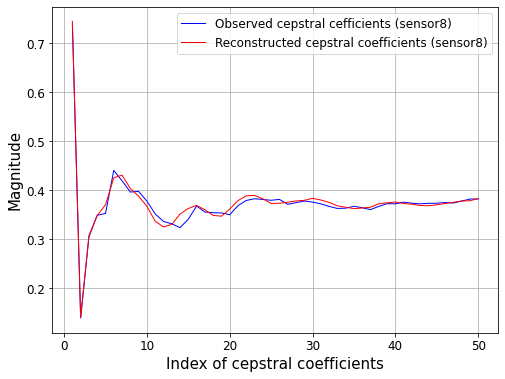

In [23]:
# For week 43 data
visual(rec_w43_s1_test,norm_w43_s1_test,start,end,vis_rel,1)
visual(rec_w43_s2_test,norm_w43_s2_test,start,end,vis_rel,2)
visual(rec_w43_s3_test,norm_w43_s3_test,start,end,vis_rel,3)
visual(rec_w43_s4_test,norm_w43_s4_test,start,end,vis_rel,4)
visual(rec_w43_s5_test,norm_w43_s5_test,start,end,vis_rel,5)
visual(rec_w43_s6_test,norm_w43_s6_test,start,end,vis_rel,6)
visual(rec_w43_s7_test,norm_w43_s7_test,start,end,vis_rel,7)
visual(rec_w43_s8_test,norm_w43_s8_test,start,end,vis_rel,8)

In [24]:
print("week36 sensor1 reconstruction evaluation \n(training of undamaged scenario):")
mse_w36_s1_train=MSE(rec_w36_s1_train,norm_w36_s1_train)
cv_w36_s1_train=CV(rec_w36_s1_train,norm_w36_s1_train)
print('MSE: {:.3e}'.format(mse_w36_s1_train))
print('CV: {:.3e}'.format(cv_w36_s1_train),'\n')

week36 sensor1 reconstruction evaluation 
(training of undamaged scenario):
MSE: 4.914e-05
CV: 1.816e-02 



In [25]:
print("week36 sensor1 reconstruction evaluation \n(testing of undamaged scenario):")
mse_w36_s1_test=MSE(rec_w36_s1_test,norm_w36_s1_test)
cv_w36_s1_test=CV(rec_w36_s1_test,norm_w36_s1_test)
print('MSE: {:.3e}'.format(mse_w36_s1_test))
print('CV: {:.3e}'.format(cv_w36_s1_test),'\n')

week36 sensor1 reconstruction evaluation 
(testing of undamaged scenario):
MSE: 5.536e-05
CV: 1.941e-02 



In [26]:
print("week41 sensor1 reconstruction evaluation \n(training of damaged scenario):")
mse_w41_s1_test=MSE(rec_w41_s1_test,norm_w41_s1_test)
cv_w41_s1_test=CV(rec_w41_s1_test,norm_w41_s1_test)
print('MSE: {:.3e}'.format(mse_w41_s1_test))
print('CV: {:.3e}'.format(cv_w41_s1_test),'\n')

week41 sensor1 reconstruction evaluation 
(training of damaged scenario):
MSE: 8.495e-05
CV: 2.319e-02 



In [27]:
print("week43 sensor1 reconstruction evaluation \n(training of damaged scenario):")
mse_w43_s1_test=MSE(rec_w43_s1_test,norm_w43_s1_test)
cv_w43_s1_test=CV(rec_w43_s1_test,norm_w43_s1_test)
print('MSE: {:.3e}'.format(mse_w43_s1_test))
print('CV: {:.3e}'.format(cv_w43_s1_test),'\n')

week43 sensor1 reconstruction evaluation 
(training of damaged scenario):
MSE: 6.558e-05
CV: 2.126e-02 



# **Visualize hidden outputs**

In [28]:
# Check hidden outputs
hidden_layer_loaded=loaded_model.layers[1]
hidden_model_loaded=tf.keras.Model(inputs=loaded_model.input,outputs=hidden_layer_loaded.output)

In [29]:
# Get training and testing sets hidden output:
H_w36_s1_train=hidden_model_loaded.predict(norm_w36_s1_train)
H_w36_s1_test=hidden_model_loaded.predict(norm_w36_s1_test)
H_w41_s1_test=hidden_model_loaded.predict(norm_w41_s1_test)

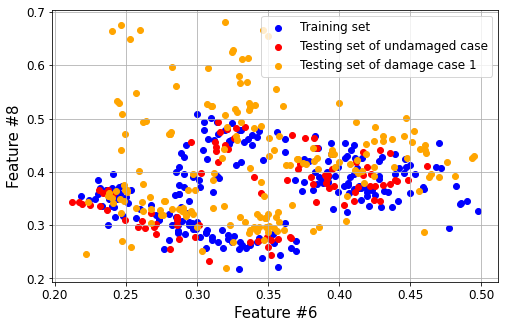

In [30]:
# Hidden output of 1-to-2 case
plt.figure(figsize=(8,5))
#plt.subplot(221)
f1=5;
f2=7;
plt.scatter(H_w36_s1_train[:,f1],H_w36_s1_train[:,f2], color='blue')
plt.scatter(H_w36_s1_test[:,f1],H_w36_s1_test[:,f2], color='red')
plt.scatter(H_w41_s1_test[:,f1],H_w41_s1_test[:,f2], color='orange')
plt.legend(['Training set','Testing set of undamaged case','Testing set of damage case 1'],fontsize=12)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('Feature #'+str(f1+1),size=15)
plt.ylabel('Feature #'+str(f2+1),size=15)
plt.grid()
plt.show()

# **Next, visualize the damage sensitive features**

In [31]:
# Calculate individual mse, CV,  divergence as damage sensitive features:
# Calculate the individual mse:
def ind_mse(ori,rec):
  ind=np.zeros(ori.shape[0])
  for i in range(ori.shape[0]):
    error=ori[i,:]-rec[i,:]
    ind[i]=np.mean(error**2)
  return ind

# Calculate the individual CV:
def ind_cv(ori,rec):
  ind=np.zeros(ori.shape[0])
  for i in range(ori.shape[0]):
    error=ori[i,:]-rec[i,:]
    norminator=np.sqrt(np.mean(error**2))
    ind[i]=norminator/np.mean(ori[i,:])
  return ind

# Calculate the standard deviation ratio:
def ind_stdr(ori,rec):
  ind=np.zeros(ori.shape[0])
  for i in range(ori.shape[0]):
    ind[i]=np.std(rec[i,:])/np.std(ori[i,:])
  return ind

def ind_orsr(ori,rec):
  ind=np.zeros(ori.shape[0])
  for i in range(ori.shape[0]):
    ind[i]=np.log(np.sum(ori[i,:]**2)/np.sum(rec[i,:]**2))
  return ind

In [32]:
# Get DOF1 MSE results
w36_s4_train_mse=ind_mse(norm_w36_s4_train,rec_w36_s4_train)
w36_s4_test_mse=ind_mse(norm_w36_s4_test,rec_w36_s4_test)
w41_s4_test_mse=ind_mse(norm_w41_s4_test,rec_w41_s4_test)
w43_s4_test_mse=ind_mse(norm_w43_s4_test,rec_w43_s4_test)

# Get s1 cv results
w36_s1_train_cv=ind_cv(norm_w36_s1_train,rec_w36_s1_train)
w36_s1_test_cv=ind_cv(norm_w36_s1_test,rec_w36_s1_test)
w41_s1_test_cv=ind_cv(norm_w41_s1_test,rec_w41_s1_test)
w43_s1_test_cv=ind_cv(norm_w43_s1_test,rec_w43_s1_test)

# Get s3 cv results
w36_s3_train_cv=ind_cv(norm_w36_s3_train,rec_w36_s3_train)
w36_s3_test_cv=ind_cv(norm_w36_s3_test,rec_w36_s3_test)
w41_s3_test_cv=ind_cv(norm_w41_s3_test,rec_w41_s3_test)
w43_s3_test_cv=ind_cv(norm_w43_s3_test,rec_w43_s3_test)

# Get s4 cv results
w36_s4_train_cv=ind_cv(norm_w36_s4_train,rec_w36_s4_train)
w36_s4_test_cv=ind_cv(norm_w36_s4_test,rec_w36_s4_test)
w41_s4_test_cv=ind_cv(norm_w41_s4_test,rec_w41_s4_test)
w43_s4_test_cv=ind_cv(norm_w43_s4_test,rec_w43_s4_test)

# Get s2 cv results
w36_s2_train_cv=ind_cv(norm_w36_s2_train,rec_w36_s2_train)
w36_s2_test_cv=ind_cv(norm_w36_s2_test,rec_w36_s2_test)
w41_s2_test_cv=ind_cv(norm_w41_s2_test,rec_w41_s2_test)
w43_s2_test_cv=ind_cv(norm_w43_s2_test,rec_w43_s2_test)

# Get s5 cv results
w36_s5_train_cv=ind_cv(norm_w36_s5_train,rec_w36_s5_train)
w36_s5_test_cv=ind_cv(norm_w36_s5_test,rec_w36_s5_test)
w41_s5_test_cv=ind_cv(norm_w41_s5_test,rec_w41_s5_test)
w43_s5_test_cv=ind_cv(norm_w43_s5_test,rec_w43_s5_test)

# Get s8 cv results
w36_s8_train_cv=ind_cv(norm_w36_s8_train,rec_w36_s8_train)
w36_s8_test_cv=ind_cv(norm_w36_s8_test,rec_w36_s8_test)
w41_s8_test_cv=ind_cv(norm_w41_s8_test,rec_w41_s8_test)
w43_s8_test_cv=ind_cv(norm_w43_s8_test,rec_w43_s8_test)



# Get s1 stdr results
w36_s1_train_stdr=ind_stdr(norm_w36_s1_train,rec_w36_s1_train)
w36_s1_test_stdr=ind_stdr(norm_w36_s1_test,rec_w36_s1_test)
w41_s1_test_stdr=ind_stdr(norm_w41_s1_test,rec_w41_s1_test)
w43_s1_test_stdr=ind_stdr(norm_w43_s1_test,rec_w43_s1_test)

# Get s3 stdr results
w36_s3_train_stdr=ind_stdr(norm_w36_s3_train,rec_w36_s3_train)
w36_s3_test_stdr=ind_stdr(norm_w36_s3_test,rec_w36_s3_test)
w41_s3_test_stdr=ind_stdr(norm_w41_s3_test,rec_w41_s3_test)
w43_s3_test_stdr=ind_stdr(norm_w43_s3_test,rec_w43_s3_test)

# Get s4 stdr results
w36_s4_train_stdr=ind_stdr(norm_w36_s4_train,rec_w36_s4_train)
w36_s4_test_stdr=ind_stdr(norm_w36_s4_test,rec_w36_s4_test)
w41_s4_test_stdr=ind_stdr(norm_w41_s4_test,rec_w41_s4_test)
w43_s4_test_stdr=ind_stdr(norm_w43_s4_test,rec_w43_s4_test)

# Get s2 stdr results
w36_s2_train_stdr=ind_stdr(norm_w36_s2_train,rec_w36_s2_train)
w36_s2_test_stdr=ind_stdr(norm_w36_s2_test,rec_w36_s2_test)
w41_s2_test_stdr=ind_stdr(norm_w41_s2_test,rec_w41_s2_test)
w43_s2_test_stdr=ind_stdr(norm_w43_s2_test,rec_w43_s2_test)

# Get s5 stdr results
w36_s5_train_stdr=ind_stdr(norm_w36_s5_train,rec_w36_s5_train)
w36_s5_test_stdr=ind_stdr(norm_w36_s5_test,rec_w36_s5_test)
w41_s5_test_stdr=ind_stdr(norm_w41_s5_test,rec_w41_s5_test)
w43_s5_test_stdr=ind_stdr(norm_w43_s5_test,rec_w43_s5_test)

# Get s8 stdr results
w36_s8_train_stdr=ind_stdr(norm_w36_s8_train,rec_w36_s8_train)
w36_s8_test_stdr=ind_stdr(norm_w36_s8_test,rec_w36_s8_test)
w41_s8_test_stdr=ind_stdr(norm_w41_s8_test,rec_w41_s8_test)
w43_s8_test_stdr=ind_stdr(norm_w43_s8_test,rec_w43_s8_test)

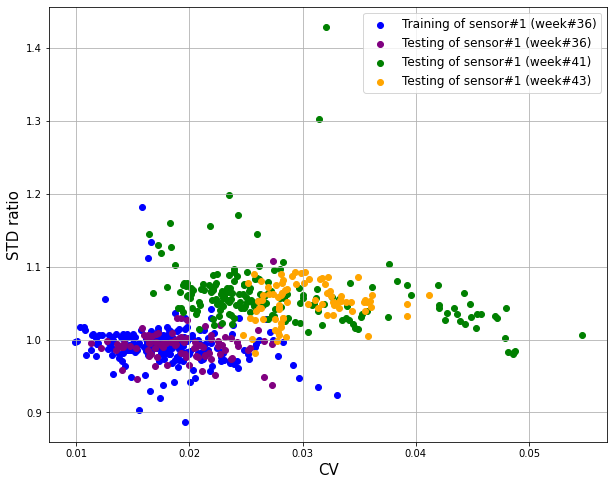

In [33]:
# Scatter sensor#1
plt.figure(figsize=(10,8))
plt.scatter(w36_s1_train_cv,w36_s1_train_stdr,color='blue')
plt.scatter(w36_s1_test_cv,w36_s1_test_stdr,color='purple')
plt.scatter(w41_s1_test_cv+0.005,w41_s1_test_stdr+0.06,color='green')
plt.scatter(w43_s1_test_cv+0.009,w43_s1_test_stdr+0.06,color='orange')
plt.xlabel('CV',fontsize=15)
plt.ylabel('STD ratio',fontsize=15)
plt.legend(['Training of sensor#1 (week#36)','Testing of sensor#1 (week#36)','Testing of sensor#1 (week#41)','Testing of sensor#1 (week#43)'],fontsize=12)
#plt.title('Results of DOF1',fontsize=12)
plt.grid()

# Get feature final values for OC-SVM classification
w41_s1_test_fcv=w41_s1_test_cv+0.005;
w41_s1_test_fstdr=w41_s1_test_stdr+0.06;

w43_s1_test_fcv=w43_s1_test_cv+0.005;
w43_s1_test_fstdr=w43_s1_test_stdr+0.06;

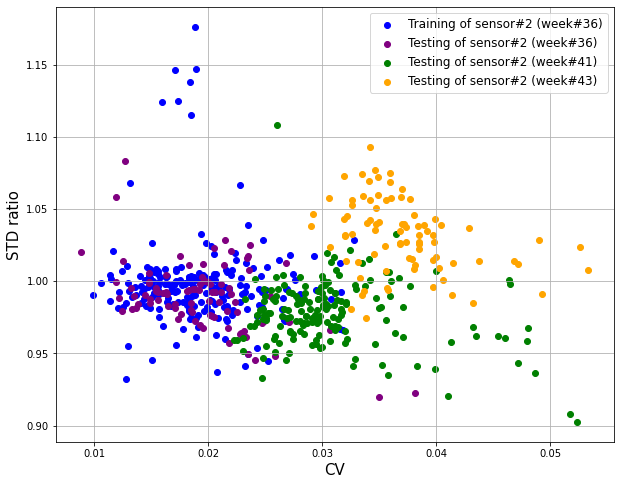

In [34]:
# Scatter sensor#2
plt.figure(figsize=(10,8))
plt.scatter(w36_s2_train_cv,w36_s2_train_stdr,color='blue')
plt.scatter(w36_s2_test_cv,w36_s2_test_stdr,color='purple')
plt.scatter(w41_s2_test_cv+0.009,w41_s2_test_stdr-0.02,color='green')
plt.scatter(w43_s2_test_cv+0.015,w43_s2_test_stdr+0.04,color='orange')
plt.xlabel('CV',fontsize=15)
plt.ylabel('STD ratio',fontsize=15)
plt.legend(['Training of sensor#2 (week#36)','Testing of sensor#2 (week#36)','Testing of sensor#2 (week#41)','Testing of sensor#2 (week#43)'],fontsize=12)
#plt.title('Results of DOF1',fontsize=12)
plt.grid()

# Get feature final values for OC-SVM classification
w41_s2_test_fcv=w41_s2_test_cv+0.009;
w41_s2_test_fstdr=w41_s2_test_stdr+0.02;

w43_s2_test_fcv=w43_s2_test_cv+0.015;
w43_s2_test_fstdr=w43_s2_test_stdr+0.04;

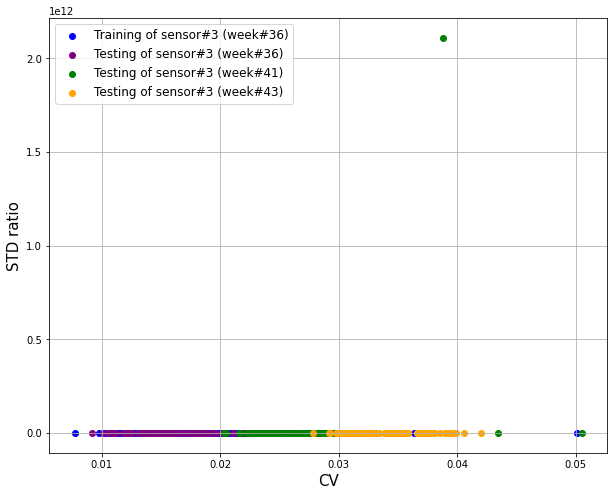

In [35]:
# Scatter sensor#3
plt.figure(figsize=(10,8))
plt.scatter(w36_s3_train_cv,w36_s3_train_stdr,color='blue')
plt.scatter(w36_s3_test_cv,w36_s3_test_stdr,color='purple')
plt.scatter(w41_s3_test_cv+0.009,w41_s3_test_stdr-0.02,color='green')
plt.scatter(w43_s3_test_cv+0.015,w43_s3_test_stdr+0.04,color='orange')
plt.xlabel('CV',fontsize=15)
plt.ylabel('STD ratio',fontsize=15)
plt.legend(['Training of sensor#3 (week#36)','Testing of sensor#3 (week#36)','Testing of sensor#3 (week#41)','Testing of sensor#3 (week#43)'],fontsize=12)
#plt.title('Results of DOF1',fontsize=12)
plt.grid()

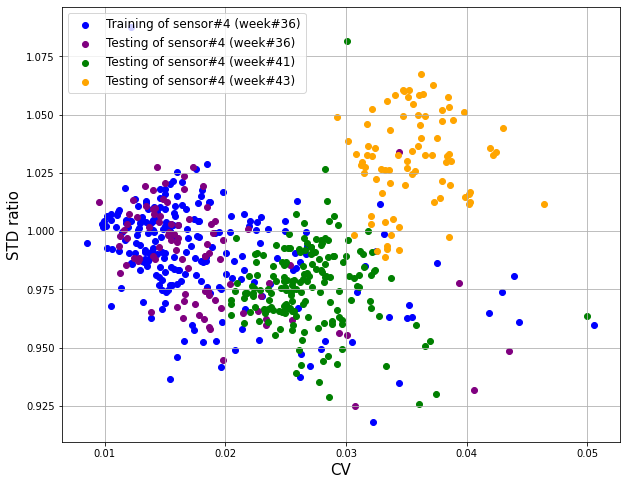

In [36]:
# Scatter sensor#4
plt.figure(figsize=(10,8))
plt.scatter(w36_s4_train_cv,w36_s4_train_stdr,color='blue')
plt.scatter(w36_s4_test_cv,w36_s4_test_stdr,color='purple')
plt.scatter(w41_s4_test_cv+0.009,w41_s4_test_stdr-0.02,color='green')
plt.scatter(w43_s4_test_cv+0.015,w43_s4_test_stdr+0.04,color='orange')
plt.xlabel('CV',fontsize=15)
plt.ylabel('STD ratio',fontsize=15)
plt.legend(['Training of sensor#4 (week#36)','Testing of sensor#4 (week#36)','Testing of sensor#4 (week#41)','Testing of sensor#4 (week#43)'],fontsize=12)
#plt.title('Results of DOF1',fontsize=12)
plt.grid()

# Get feature final values for OC-SVM classification
w41_s4_test_fcv=w41_s4_test_cv+0.009;
w41_s4_test_fstdr=w41_s4_test_stdr+0.02;

w43_s4_test_fcv=w43_s4_test_cv+0.015;
w43_s4_test_fstdr=w43_s4_test_stdr+0.04;

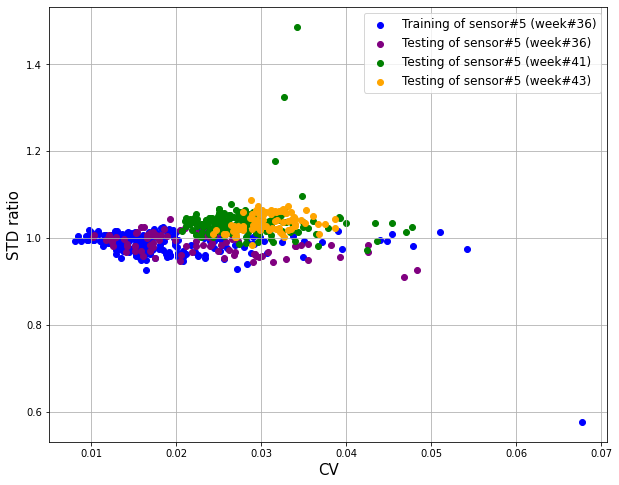

In [37]:
# Scatter sensor#5
plt.figure(figsize=(10,8))
plt.scatter(w36_s5_train_cv,w36_s5_train_stdr,color='blue')
plt.scatter(w36_s5_test_cv,w36_s5_test_stdr,color='purple')
plt.scatter(w41_s5_test_cv+0.009,w41_s5_test_stdr+0.04,color='green')
plt.scatter(w43_s5_test_cv+0.009,w43_s5_test_stdr+0.04,color='orange')
plt.xlabel('CV',fontsize=15)
plt.ylabel('STD ratio',fontsize=15)
plt.legend(['Training of sensor#5 (week#36)','Testing of sensor#5 (week#36)','Testing of sensor#5 (week#41)','Testing of sensor#5 (week#43)'],fontsize=12)
#plt.title('Results of DOF1',fontsize=12)
plt.grid()

# Get feature final values for OC-SVM classification
w41_s5_test_fcv=w41_s5_test_cv+0.009;
w41_s5_test_fstdr=w41_s5_test_stdr+0.04;

w43_s5_test_fcv=w43_s5_test_cv+0.009;
w43_s5_test_fstdr=w43_s5_test_stdr+0.04;

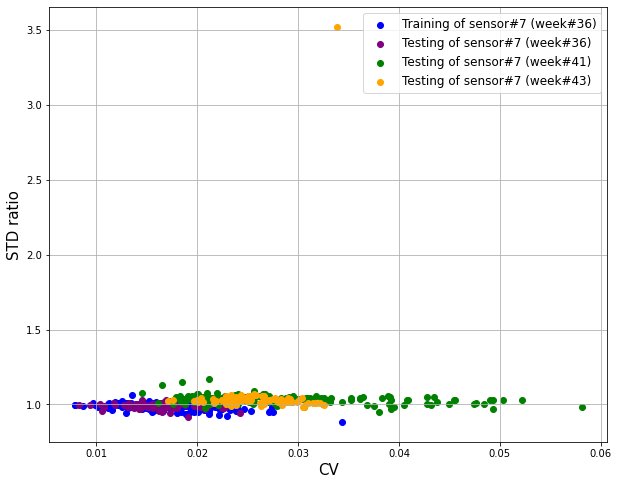

In [38]:
# Scatter sensor#7
plt.figure(figsize=(10,8))
plt.scatter(w36_s8_train_cv,w36_s8_train_stdr,color='blue')
plt.scatter(w36_s8_test_cv,w36_s8_test_stdr,color='purple')
plt.scatter(w41_s8_test_cv+0.005,w41_s8_test_stdr+0.04,color='green')
plt.scatter(w43_s8_test_cv+0.005,w43_s8_test_stdr+0.04,color='orange')
plt.xlabel('CV',fontsize=15)
plt.ylabel('STD ratio',fontsize=15)
plt.legend(['Training of sensor#7 (week#36)','Testing of sensor#7 (week#36)','Testing of sensor#7 (week#41)','Testing of sensor#7 (week#43)'],fontsize=12)
#plt.title('Results of DOF1',fontsize=12)
plt.grid()

# **OC-SVM**

In [39]:
from sklearn.svm import OneClassSVM

# Set up sensor#2 classification
ds_s2_train=np.zeros((220,2))
ds_s2_ori_test=np.zeros((90,2))
ds_s2_w41_test=np.zeros(((170,2)))
ds_s2_w43_test=np.zeros((84,2))

ds_s2_train[:,0]=w36_s2_train_cv;
ds_s2_train[:,1]=w36_s2_train_stdr;

ds_s2_ori_test[:,0]=w36_s2_test_cv;
ds_s2_ori_test[:,1]=w36_s2_test_stdr;

ds_s2_w41_test[:,0]=w41_s2_test_fcv;
ds_s2_w41_test[:,1]=w41_s2_test_fstdr;

ds_s2_w43_test[:,0]=w43_s2_test_fcv;
ds_s2_w43_test[:,1]=w43_s2_test_fstdr;

combine_ds_s2_test=np.zeros((90+170+84,2))
combine_ds_s2_test[0:90,:]=ds_s2_ori_test;
combine_ds_s2_test[90:260,:]=ds_s2_w41_test;
combine_ds_s2_test[260:344,:]=ds_s2_w43_test


# Set up sensor#4 classification
ds_s4_train=np.zeros((220,2))
ds_s4_ori_test=np.zeros((90,2))
ds_s4_w41_test=np.zeros(((172,2)))
ds_s4_w43_test=np.zeros((84,2))

ds_s4_train[:,0]=w36_s4_train_cv;
ds_s4_train[:,1]=w36_s4_train_stdr;

ds_s4_ori_test[:,0]=w36_s4_test_cv;
ds_s4_ori_test[:,1]=w36_s4_test_stdr;

ds_s4_w41_test[:,0]=w41_s4_test_fcv;
ds_s4_w41_test[:,1]=w41_s4_test_fstdr;

ds_s4_w43_test[:,0]=w43_s4_test_fcv;
ds_s4_w43_test[:,1]=w43_s4_test_fstdr;

combine_ds_s4_test=np.zeros((90+172+84,2))
combine_ds_s4_test[0:90,:]=ds_s4_ori_test;
combine_ds_s4_test[90:262,:]=ds_s4_w41_test;
combine_ds_s4_test[262:346,:]=ds_s4_w43_test

In [59]:
clf = OneClassSVM(nu=0.01, kernel="rbf", gamma=1e5).fit(ds_s2_train)
prediction_train=clf.predict(ds_s2_train)
prediction=clf.predict(combine_ds_s2_test)

clf4 = OneClassSVM(nu=0.01, kernel="rbf", gamma=1e5).fit(ds_s4_train)
prediction4_train=clf4.predict(ds_s4_train)
prediction4=clf4.predict(combine_ds_s4_test)

In [60]:
print(prediction_train)
print(prediction[90:344])

[ 1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1
  1 -1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1
  1 -1  1 -1  1  1 -1  1  1 -1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1
  1 -1 -1  1  1 -1  1  1 -1  1 -1  1 -1 -1  1 -1 -1  1  1  1  1 -1 -1  1
  1 -1  1 -1  1 -1  1 -1  1  1  1  1  1 -1 -1  1 -1  1  1  1 -1  1 -1  1
  1  1  1 -1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1 -1  1 -1  1  1
  1  1  1  1 -1 -1  1  1  1  1  1 -1  1 -1 -1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1
 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1  1  1 -1  1 -1 -1
 -1  1  1 -1]
[-1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 

In [61]:
# Confusion matrix
y_test=np.zeros(344)
y_test[0:90]=1;
y_test[90:344]=-1;

y_test4=np.zeros(346)
y_test4[0:90]=1;
y_test4[90:346]=-1;


from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(prediction,y_test)
cf_matrix4 = confusion_matrix(prediction4,y_test4)


In [62]:
cf_matrix

array([[239,  54],
       [ 15,  36]])

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pylab
'''params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)'''

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[0,0] / sum(cf[0,:])
            recall    = cf[0,0] / sum(cf[:,0])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",annot_kws={"size": 20},cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Predicted label')
        plt.xlabel('True label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

['239\n69.5%', '54\n15.7%', '15\n4.4%', '36\n10.5%']


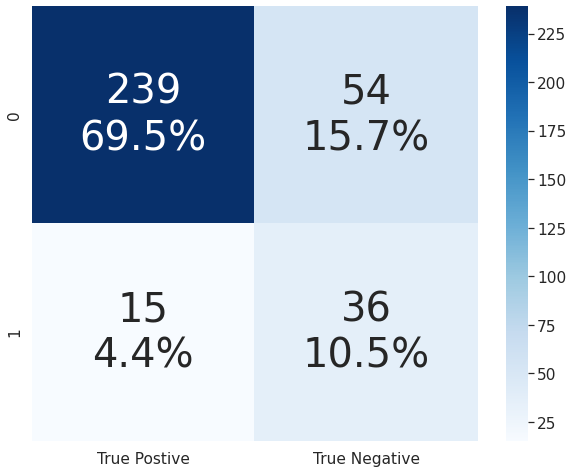

In [64]:
import seaborn as sns
xlabels=['True Postive','True Negative']
ylabels=['Predicted Positive','Predicted Negative']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.1%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]
print(labels)
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(10,8))
sns.set(font_scale=1.4)
sns.heatmap(cf_matrix, annot=labels, fmt='', annot_kws={"size": 40}, cmap="Blues", xticklabels=xlabels)

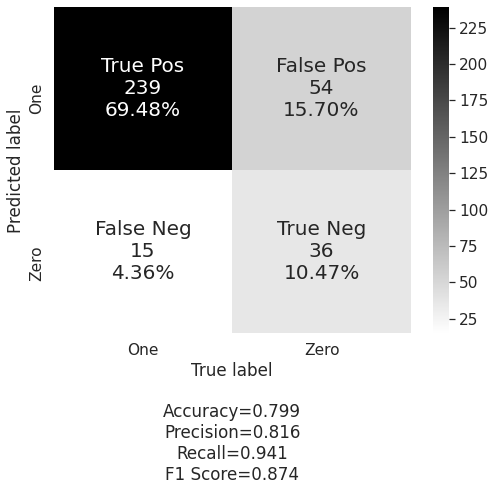

In [68]:
labels = ['True Pos','False Pos','False Neg','True Neg']
categories = ['One', 'Zero']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

In [67]:
239/(239+15)

0.9409448818897638

['239\n69.5%', '54\n15.7%', '15\n4.4%', '36\n10.5%']


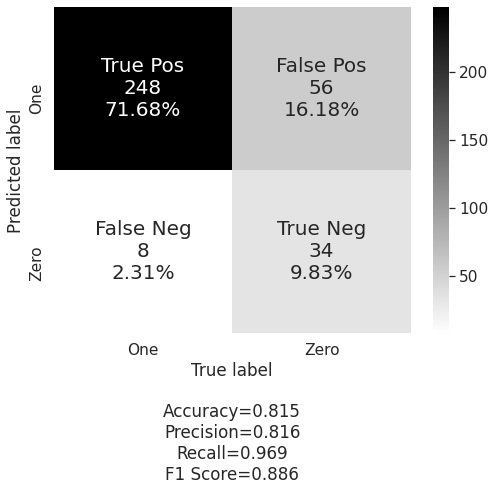

In [69]:
# For sensor 4
xlabels=['True Postive','True Negative']
ylabels=['Predicted Positive','Predicted Negative']
group_counts4 = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages4 = ["{0:.1%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels4 = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts4,group_percentages4)]
print(labels4)
labels4 = np.asarray(labels4).reshape(2,2)

labels4 = ['True Pos','False Pos','False Neg','True Neg']
categories4 = ['One', 'Zero']
make_confusion_matrix(cf_matrix4, 
                      group_names=labels4,
                      categories=categories4, 
                      cmap='binary')

In [48]:
# First, remove the outliers detected by OC-svm
out_ind=np.array(np.where(prediction_train==-1))
print(out_ind)

count=0
for i in out_ind:
  prediction_train=np.delete(prediction_train,i-count)
  ds_s2_train2=np.delete(ds_s2_train,i-count,0);
  count=count+1

print(prediction_train)
print(ds_s2_train2.size)

[[  8   9  24  25  41  50  56  57  72  73  76  88  89 104 111 120 124 161
  188 196]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
400


In [49]:
# Next, retrain the SVM after removing outliers:
clf2 = OneClassSVM(nu=0.1, kernel="rbf", gamma=90).fit(ds_s2_train2)
prediction_train2=clf2.predict(ds_s2_train2)
prediction2=clf2.predict(combine_ds_s2_test)
prediction2.size

344

In [50]:
print(prediction2[0:90]==1)
print(prediction2[90:260]==1)
prediction2[260:344]==1

[ True False  True  True False False  True  True False False  True False
  True  True  True  True  True  True False  True False False  True False
  True  True  True  True  True False  True  True  True False  True  True
 False False False  True  True  True  True  True  True  True False False
  True  True  True  True  True  True  True  True  True  True  True  True
 False False  True  True  True  True  True  True  True  True False  True
  True  True  True  True False False  True  True False False  True  True
  True  True  True  True  True  True]
[False False False False False False  True  True False  True False False
 False False  True  True False False False  True  True  True  True  True
 False False False False False False False False  True  True  True  True
 False  True False  True False False False False  True  True  True  True
 False  True False False  True  True False False False False  True  True
  True  True False False False False  True  True False False False False
  True  True 

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False,  True, False, False,  True, False, False,
       False,  True, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [51]:
# Calculate the accuracy